# Chuẩn bị dữ liệu

In [ ]:
# Tải dữ liệu cho model
!git clone https://github.com/Luan2004/data.git

Cloning into 'data'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 3.51 MiB | 1.10 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical # type: ignore

def preprocessing_data(path, type):
  dtrain = pd.read_csv(path)
  # Tách label và các đặc trưng
  X = dtrain.iloc[:, :-1].values  # Các cột đặc trưng
  y = dtrain.iloc[:, -1].values   # Cột nhãn



  # Chuẩn hóa dữ liệu
  scaler = StandardScaler()
  if (type == 'train'):
    X_scaled = scaler.fit_transform(X)
  else:
    df = pd.read_csv('/content/data/Dtrain1.csv')
    X_pretrain = df.iloc[:, :-1].values
    scaler.fit(X_pretrain)
    X_scaled = scaler.transform(X)

  # Mã hóa nhãn thành số nguyên
  global label_encoder
  label_encoder = LabelEncoder()
  y_encoded = label_encoder.fit_transform(y)

  # Chuyển nhãn thành dạng one-hot encoding
  y_onehot = to_categorical(y_encoded, num_classes=15)

  # Định hình lại dữ liệu (samples, timesteps, features)
  X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))
  return X_scaled, y_onehot

X_train, y_train = preprocessing_data('/content/data/Dtrain1.csv', 'train')   # Tập train
X_test, y_test = preprocessing_data('/content/data/Dtest1.csv', 'test')       # Tập test
Xp, yp = preprocessing_data('/content/data/predict.csv', 'predict')         # Tập predict


# Xây dựng mô hình GRU

In [ ]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import  Input, Dense, Dropout, GRU, BatchNormalization # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.metrics import Precision, Recall # type: ignore

model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(GRU(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=15, activation='softmax'))

**Compile mô hình**

In [ ]:
optimizers = Adam(learning_rate=0.00008)
model.compile(optimizer=optimizers, loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Huấn luyện model

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.5195 - loss: 2.1437 - precision: 0.7233 - recall: 0.0561 - val_accuracy: 0.9152 - val_loss: 0.5394 - val_precision: 0.9769 - val_recall: 0.8304
Epoch 2/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9170 - loss: 0.4666 - precision: 0.9751 - recall: 0.8229 - val_accuracy: 0.9644 - val_loss: 0.1694 - val_precision: 0.9694 - val_recall: 0.9491
Epoch 3/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9630 - loss: 0.1948 - precision: 0.9746 - recall: 0.9383 - val_accuracy: 0.9744 - val_loss: 0.1016 - val_precision: 0.9755 - val_recall: 0.9739
Epoch 4/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9704 - loss: 0.1291 - precision: 0.9753 - recall: 0.9628 - val_accuracy: 0.9762 - val_loss: 0.0813 - val_precision: 0.9776 - val_recall: 0.9756
Epoch 5/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9725 - loss: 0.1006 - precision: 0.9769 - recall: 0.9689 - val_accuracy: 0.9769 

# Đánh giá model

306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9950 - loss: 0.0180 - precision: 0.9950 - recall: 0.9950
Accuracy: 98.36%
Loss: 0.03938180208206177
Precision: 98.36%
Recall: 98.36%


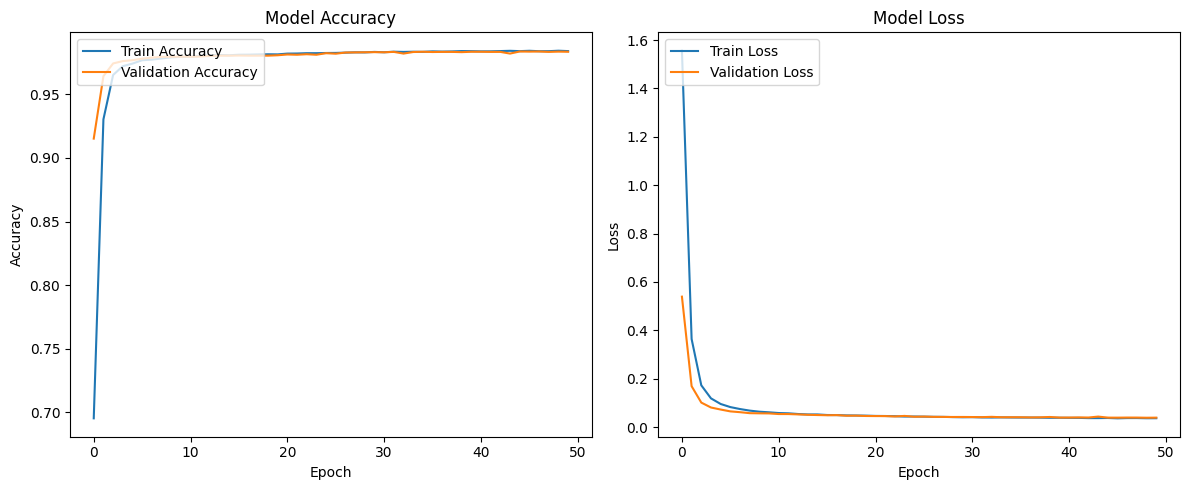

In [ ]:
import matplotlib.pyplot as plt
# Đánh giá mô hình trên tập test
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Loss: {loss}')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')

# Lưu mô hình
model.save('my_model.keras')

# Tạo figure và chia làm 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Vẽ biểu đồ Accuracy
axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='upper left')

# Vẽ biểu đồ Loss
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper left')

# Hiển thị cả hai biểu đồ cùng lúc
plt.tight_layout()
plt.show()

# Thử nghiệm

In [ ]:
# Sử dụng mô hình đã huấn luyện để dự đoán trên tập kiểm tra
y_pred = model.predict(Xp)

# Chuyển dự đoán thành nhãn
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(yp, axis=1)

# Giải mã nhãn dự đoán thành tên loại tấn công
predicted_attack_names = label_encoder.inverse_transform(y_pred_labels)

# Hiển thị nhãn thực tế và nhãn dự đoán
print("Nhãn thực tế và dự đoán:")
for i in range(len(y_pred_labels)):  # In 10 dự đoán đầu tiên để kiểm tra
    print(f"Nhãn thực tế: {label_encoder.inverse_transform([y_test_labels[i]])[0]} - Dự đoán: {predicted_attack_names[i]}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Nhãn thực tế và dự đoán:
Nhãn thực tế: BENIGN - Dự đoán: BENIGN
Nhãn thực tế: BENIGN - Dự đoán: BENIGN
Nhãn thực tế: BENIGN - Dự đoán: BENIGN
Nhãn thực tế: BENIGN - Dự đoán: BENIGN
Nhãn thực tế: Bot - Dự đoán: Bot
Nhãn thực tế: Bot - Dự đoán: Bot
Nhãn thực tế: Bot - Dự đoán: Bot
Nhãn thực tế: Bot - Dự đoán: Bot
Nhãn thực tế: Bot - Dự đoán: Bot
Nhãn thực tế: DDoS - Dự đoán: DDoS
Nhãn thực tế: DDoS - Dự đoán: DDoS
Nhãn thực tế: DDoS - Dự đoán: DDoS
Nhãn thực tế: DDoS - Dự đoán: DDoS
Nhãn thực tế: DDoS - Dự đoán: DDoS
Nhãn thực tế: DoS GoldenEye - Dự đoán: DoS GoldenEye
Nhãn thực tế: DoS GoldenEye - Dự đoán: DoS GoldenEye
Nhãn thực tế: DoS GoldenEye - Dự đoán: DoS GoldenEye
Nhãn thực tế: DoS GoldenEye - Dự đoán: DoS GoldenEye
Nhãn thực tế: DoS GoldenEye - Dự đoán: DoS GoldenEye
Nhãn thực tế: DoS Hulk - Dự đoán: DoS Hulk
Nhãn thực tế: DoS Hulk - Dự đoán: DoS Hulk
Nhãn thực tế: DoS Hulk - Dự đoán: DoS Hulk
Nhãn thực tế: DoS Hulk - Dự đoán: DoS Hulk
Nhãn